In [1]:
import sympy as sym

In [2]:
c, a, wealth, utility = sym.symbols("c a w u", real=True, positive=True)
CRRA, WealthShare, WealthShift = sym.symbols(
    "sigma delta  \\underline{a}", real=True, positive=True
)
vp_a = sym.symbols("v_a", real=True, positive=True)

In [3]:
w = a + WealthShift
w

\underline{a} + a

In [4]:
u = (c ** (1 - WealthShare) * w**WealthShare) ** (1 - CRRA) / (1 - CRRA)
u

(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(1 - sigma)

In [5]:
u_alt = u.replace(w, wealth)
u_alt

(c**(1 - delta)*w**delta)**(1 - sigma)/(1 - sigma)

In [6]:
dudc = sym.diff(u, c)
dudc.simplify().replace(w, wealth).cancel().simplify()

c**(delta*sigma - delta - sigma)*w**(delta*(1 - sigma))*(1 - delta)

In [7]:
dudw = u.replace(w, wealth).diff(wealth)
dudw.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma + 1)*delta*w**(delta*(1 - sigma) - 1)

In [8]:
duda = sym.diff(u, a)
duda.replace(w, wealth).simplify().cancel().simplify()

c**(delta*sigma - delta - sigma + 1)*delta*w**(delta*(1 - sigma) - 1)

In [9]:
dudcdc = sym.diff(dudc.replace(w, wealth), c)
dudcdc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma - 1)*w**(delta*(1 - sigma))*(-delta**2*sigma + delta**2 + 2*delta*sigma - delta - sigma)

In [10]:
dudadc = sym.diff(duda.replace(w, wealth), c)
dudadc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma)*delta*w**(delta*(1 - sigma) - 1)*(delta*sigma - delta - sigma + 1)

In [11]:
euler = dudc - duda
euler

-c**(1 - delta)*c**(delta - 1)*delta*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(\underline{a} + a) + c**(1 - delta)*c**(delta - 1)*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)*(1 - delta)/c

In [12]:
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.ConsumptionSaving.ConsWealthPortfolioModel import WealthPortfolioConsumerType
from HARK.utilities import plot_funcs

In [13]:
cycles = 0
port_agent = PortfolioConsumerType(cycles=cycles)
wealth_agent = WealthPortfolioConsumerType(
    cycles=cycles, WealthShare=0.01, WealthShift=0.0
)
port_agent.CRRA
port_agent.aXtraGrid[0]

0.0009999999999998899

In [14]:
port_agent.solve()
# port_agent.completed_cycles

In [15]:
wealth_agent.solve()
# wealth_agent.completed_cycles

c:\Users\alujan\micromamba\envs\hark-dev\lib\site-packages\scipy\optimize\_root_scalar.py:315: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=None,


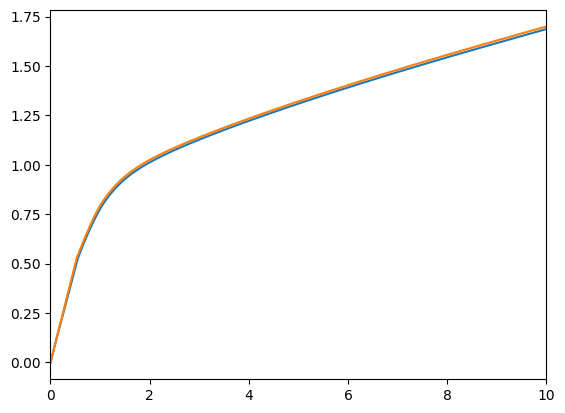

In [16]:
plot_funcs([wealth_agent.solution[0].cFuncAdj, port_agent.solution[0].cFuncAdj], 0, 10)

In [17]:
wealth_agent.solution[0].cFuncAdj.y_list

array([0.        , 0.09897439, 0.5241495 , 0.57159817, 0.61058339,
       0.64604894, 0.6789416 , 0.70926494, 0.73715601, 0.76188547,
       0.78370566, 0.80313825, 0.82054635, 0.83618013, 0.85081159,
       0.86450686, 0.87738236, 0.88950449, 0.90102701, 0.91195689,
       0.92241681, 0.93241542, 0.94193209, 0.95107539, 0.95991193,
       0.96844682, 0.97669905, 0.98473857, 0.99260001, 1.00028271,
       1.00782907, 1.01527035, 1.02262089, 1.0298891 , 1.03710862,
       1.04429518, 1.05146052, 1.05860253, 1.06573275, 1.07287696,
       1.08004235, 1.08723673, 1.09446068, 1.10173118, 1.10905203,
       1.11643161, 1.12387633, 1.13138581, 1.13897191, 1.14664096,
       1.15439737, 1.16224531, 1.17018419, 1.17822186, 1.18636443,
       1.19461561, 1.20297913, 1.2114587 , 1.22005538, 1.22877272,
       1.23761561, 1.24658724, 1.25569135, 1.26493183, 1.2743119 ,
       1.28383336, 1.29349945, 1.30331452, 1.31328114, 1.32340238,
       1.33368201, 1.34412296, 1.35472787, 1.36549786, 1.37643

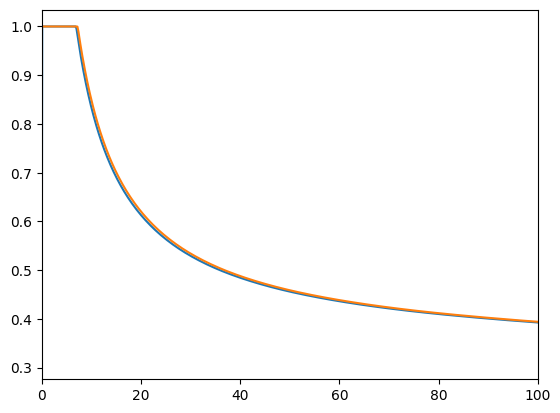

In [18]:
plot_funcs(
    [wealth_agent.solution[0].ShareFuncAdj, port_agent.solution[0].ShareFuncAdj], 0, 100
)